# Cuaderno de Regresión

Con este cuaderno se estudiarán métodos de regresión empleando diferentes técnicas para calcular la regresión. También se eplearán modelos pre existentes en la librería scikit-learn
para analizar el dataset ice_cream_revenue

## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo
En la primera sección se emplearán modelos de regresión encontrados con el método de mínimos cuadrados que se basa en encontrar la solución óptima para un problema de la forma
$$ Ax=b $$ y puede ser resuelto con álgebra lineal.


In [64]:
import numpy as np
import matplotlib.pyplot as plt


### 1.1 Modelo lineal
Se trabajará con datos artificialmente generados. Creamos datos basados en la ecuación de una línea recta, luego agregamos ruido y graficamos los datos para tener una visualización de su comportamiento
El ruido que se agrega es de naturaleza Gaussiana, con media cero y desviación estándar de 0.75. Se crean 100 datos para efectos de una visualización adecuada

Text(0.5, 1.0, 'Dataset generado')

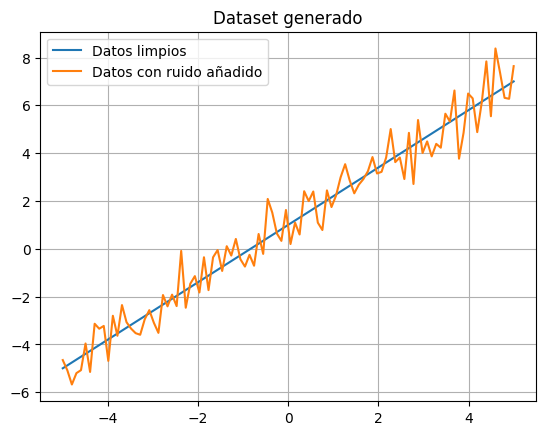

In [65]:
datos_x = np.linspace(-5, 5, 100) # 100 datos del 0 al 20
pendiente = 1.2
intersecto = 1
datos_y = datos_x * pendiente + intersecto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,0.75,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

### 1.2 Creación del modelo
posteriormente se crea el modelo y las matrices para resolver el problema de optimización de la forma
$$
A\times x = b
$$

En donde, en la matriz $A$ se colocan los valores independientes (x) y una columna de unos para multiplicar la matriz de parámetros ( a encontrar) $b$. La solución del sistema se puede hallar con la pseudo inversa de Moore penrose, disponible en `numpy.linalg.pinv()`


In [66]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parametros son: ", parametros_b)

Los parametros son:  [1.19731585 1.02085345]


Text(0.5, 1.0, 'Modelo de regresión lineal')

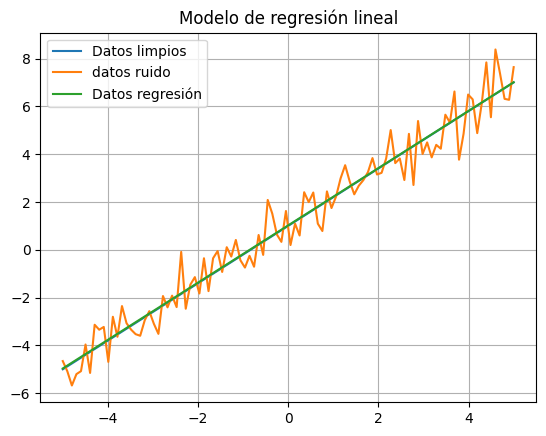

In [67]:
# A partir de los datos con ruido se puede crear un nuevo modelo que se ajuste minimizando el error cuadrático
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

## Sección 2: Análisis y  Regresión del dataset Ice-cream-revenue
### 2.1 Análisis exploratorio de los datos

Se empleará el dataset ice-cream-revenue que tiene las columnas de temperatura y cantidad vendida de helados. Utilizando scikit-learn se crearán modelos de regresión. El dataset se preprocesará para poder tener datos de evaluación del modelo


In [68]:
import pandas as pd
import sklearn
import seaborn as sns


In [69]:
df_helados = pd.read_csv("IceCreamData.csv")
#df_helados.head()
df_helados

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [70]:
df_helados.info

<bound method DataFrame.info of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

In [71]:
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


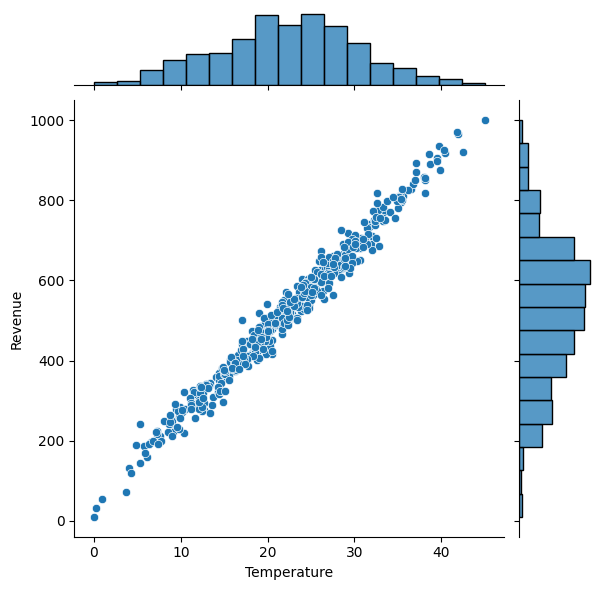

In [72]:
sns.jointplot(x="Temperature", y="Revenue", data=df_helados)

### 2.2 Preparando los datos
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [73]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


### 2.3 modelo de regresión lineal
Emplearemos el modelo `LinearRegression` de scikit-learn para ajustar los datos

In [74]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [21.30358818], el intersecto (A) es 48.37902506025631


### 2.4 Evaluación del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

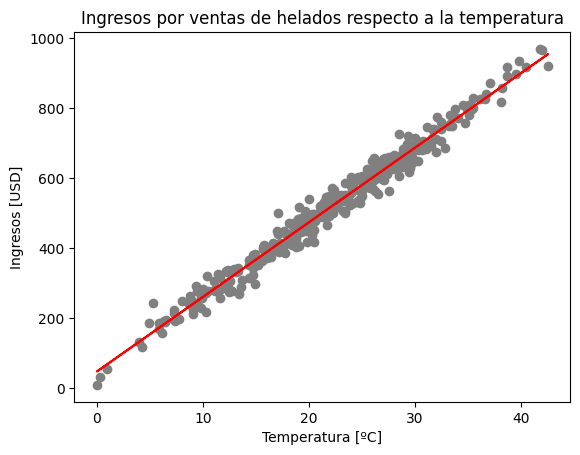

In [75]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

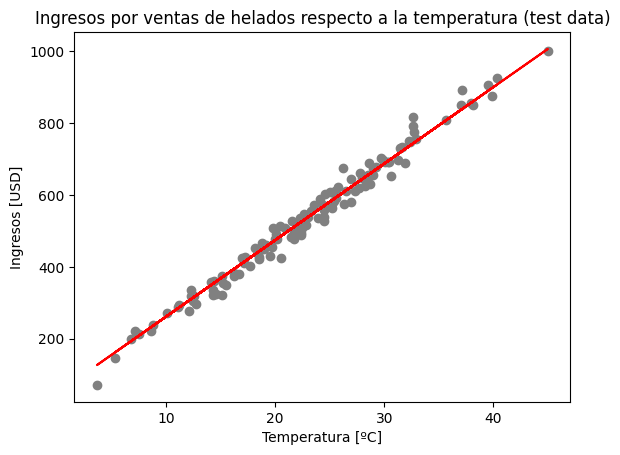

In [76]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')



### Error medio cuadrático
Es una de las medidas más empleadas como función de pérdida en los algoritmos de regresión. Mide la distancia cuadrática entre una predicción del modelo respecto al dato correspondiente en el conjunto de datos para todos los puntos que tenga el conjunto de datos. Luego calcula el promedio de esas distancias.



In [77]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error: 554.260274008029
Root Mean Squared Error: 23.542732934135515


# Error medio absoluto
Es la diferencia entre los valores estimados y los reales. Se calcula el promedio de todas las diferencias para encontrar el valor del error


## Tarea:

Error cuadratico medio == mse (mean squared error)

RECORDAR HACER LA GRÁFICA DE LA DISTRUBUCIÓN DE LOS RESIDUOS (histograma de error)


###Mean absolute error manual

In [78]:
def get_mean_absolute_error(y_real, y_pred):
  absolute = abs(y_real - y_pred)
  mae = np.mean(absolute)
  return mae

error_media_absoluto = get_mean_absolute_error(y_test, y_pred)
print("Error medio absoluto:", error_media_absoluto)

Error medio absoluto: 18.375378447541873


In [79]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 18.375378447541873


###Mean Square Error Manual

In [80]:
def get_mean_squared_error(y_real, y_pred):
  squared = (y_real - y_pred)**2
  mse = np.mean(squared)
  return mse

error_media_cuadratico = get_mean_squared_error(y_test, y_pred)
print("Error caudratico medio:", error_media_cuadratico)
print("Raiz Error caudratico medio:", np.sqrt(error_media_cuadratico))

Error caudratico medio: 554.260274008029
Raiz Error caudratico medio: 23.542732934135515


### R cuadrado
Es una medida estadística que indica que tan cerca estan los datos de ajustarse a una línea recta. Se conoce también como el coeficiente de determinación.

In [81]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9824533429701313


Manual R cuadrado


In [82]:
def get_rse(y_real, y_pred):
  num = sum((y_real - y_pred)**2)
  den = sum((y_real - np.mean(y_pred))**2)
  RSE = num/den
  return RSE

rse = get_rse(y_test, y_pred)
print("Residual standar error:", rse)
print("R_2:", 1-rse)

Residual standar error: 0.017544979901537975
R_2: 0.982455020098462


### Histograma de errores

Text(0.5, 1.0, 'Histograma de errores')

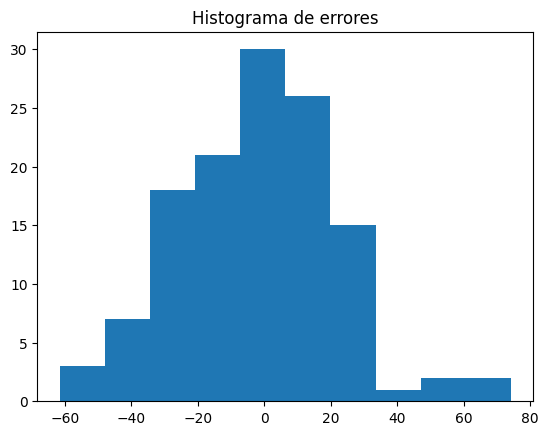

In [83]:
error = y_test - y_pred
plt.hist(error)
plt.title("Histograma de errores")

# Sección 3: regresión polinómica

Se crearán datos sintéticos para realizar la regrresión a un polinomio.


Text(0.5, 1.0, 'Dataset generado')

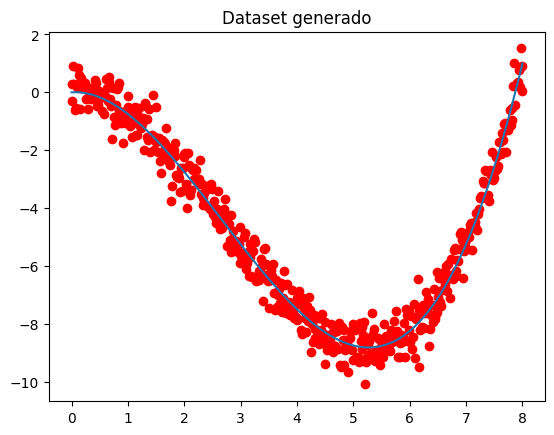

In [84]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

Para la regresión con un polinomio, se necesita preprocesar los datos `x_data` para que modelen un polinomio del grado indicado. Esto es, crear la matriz A para resolver el problema de la forma $Ax = b$, las dimensiones de la matriz A son de $m\times m$ siendo m el grado del polinomio

**Ejercicio**: Variar el grado del polinomio. Los datos corresponden a un polinomio de tercer grado, Se puede apreciar que con grados inferiores los datos van a tener un mal ajuste y con grados superiores puede existir sobre entrenamiento, por ejemplo de grado 20 se empiezan a notar problemas de ajuste

## Degree 1


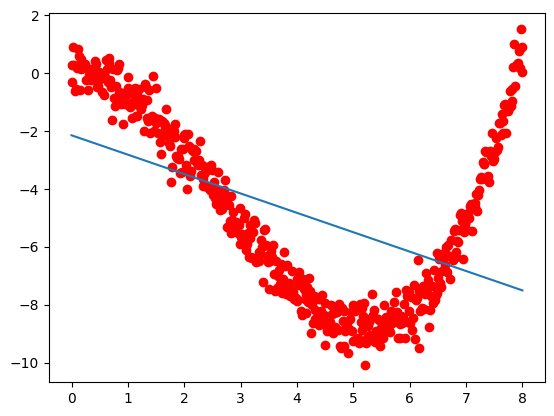

In [85]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=1)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)




In [86]:
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 2.281861458735935
Root Mean Squared Error: 2.7448896952200594
R^2: 0.24217997027506633


Al ser de grado 1 la regresion hecha, esta no se ajusta a la grafica en ningun sentido, se observan errores bastante altos para los datos presentes y tambien el R^2 es bastante bajo por lo que es necesario subir el grado del polinomio regresor.

## Degree 2


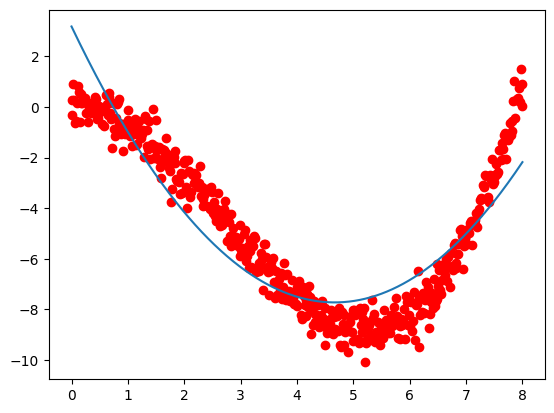

In [87]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)


In [88]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 1.0788109978909919
Root Mean Squared Error: 1.2947477064243527
R^2: 0.8313887348998287


Para este caso disminuye el valor del error y aumenta el valor del R^2 lo que presenta que este modelo se ajusta mejor, en la grafica también es posible observar los puntos que toma la regresión son más.

## Degree 3


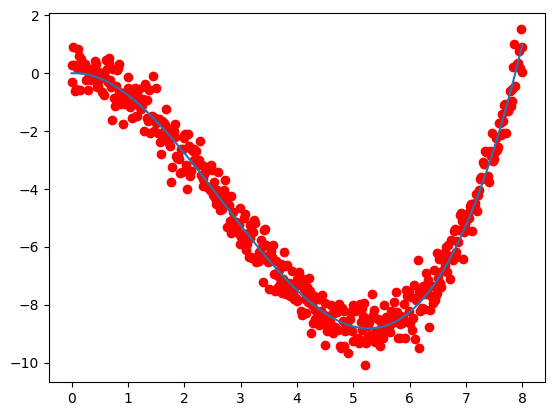

In [89]:
poly_regressor = PolynomialFeatures(degree=3)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)


In [90]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.3978352325386837
Root Mean Squared Error: 0.49179988512991146
R^2: 0.975672743617626


Se puede observar de manera inicial en la grafica como la linea de orden 3 que se genera se ajusta de mejor manera a los datos cruzando por la mitad de estos, esto tiene bastante sentido dado que el orden del polinomio de los datos antes del ruido es de orden 3, de manera que esta deberia ser la regresión que mejor se ajuste, por otra parte los errores son menores con respecto a los casos anteriores, de igual manera se tiene un R^2 que es mas alt y se aproxima a 1, indicando que es un modelo que se ajusta bastante bien a los datos.

## Degree 4

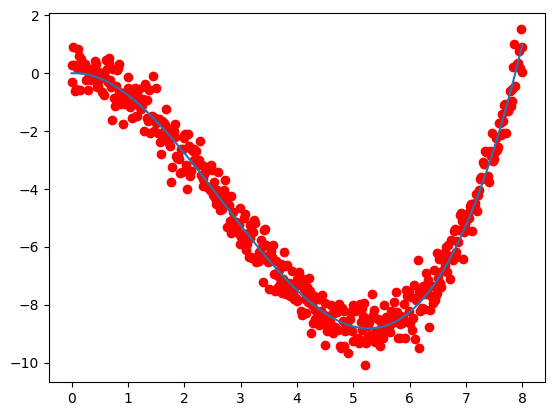

In [91]:
poly_regressor = PolynomialFeatures(degree=4)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)


In [92]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.3978352325386835
Root Mean Squared Error: 0.49179988512991113
R^2: 0.975672743617626


Este modelo presenta valores similares al de grado 3, aunque se puede observar en la ultima decima de los valores que este modelo presenta un ajuste ligeramente mejor, depronto el ruido presente hace que el polinomio de grado 4 se ajuste mejor.

## Degree 5


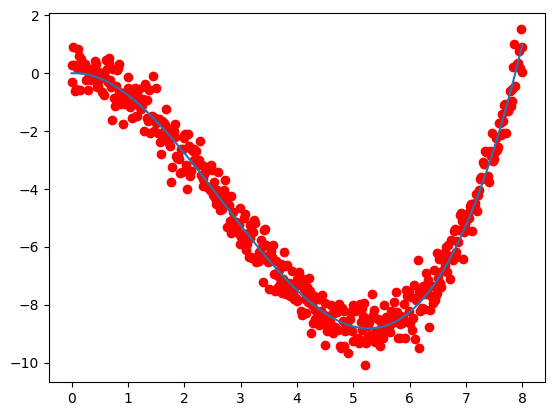

In [93]:
poly_regressor = PolynomialFeatures(degree=5)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)


In [94]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))


Mean Absolute Error: 0.3978352325386793
Root Mean Squared Error: 0.4917998851299087
R^2: 0.9756727436176262


Este modelo presenta valores iguales que los del polinomio de grado 3.

## Degree 6

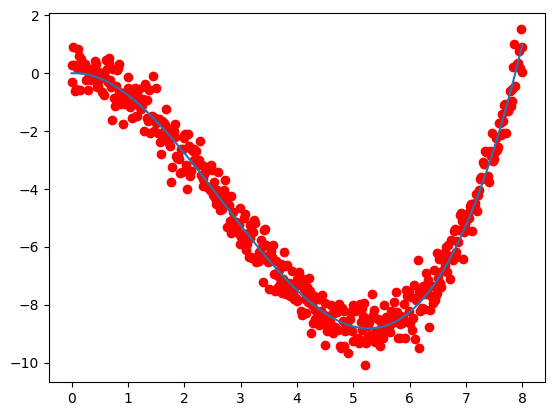

In [95]:
poly_regressor = PolynomialFeatures(degree=6)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)


In [96]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.39783523253870545
Root Mean Squared Error: 0.49179988512992273
R^2: 0.9756727436176249


Este modelo presenta mejores valores que el de grado 4, por consiguiente es el modelo que mejor se ha comportado hasta al momento, reduciendo los valores de error y aumentando el valor de ajuste R^2

## Degree 7


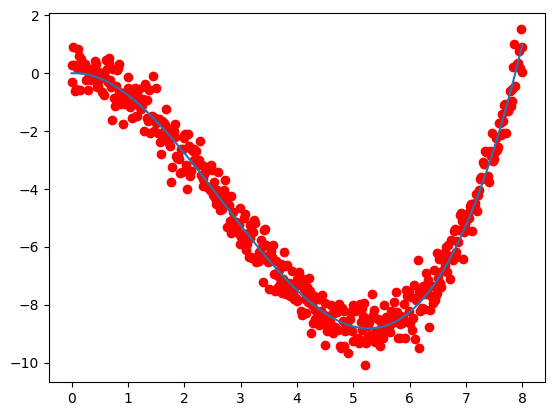

In [97]:
poly_regressor = PolynomialFeatures(degree=7)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [98]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.39783523253919884
Root Mean Squared Error: 0.4917998851302559
R^2: 0.9756727436175919


## Degree 8


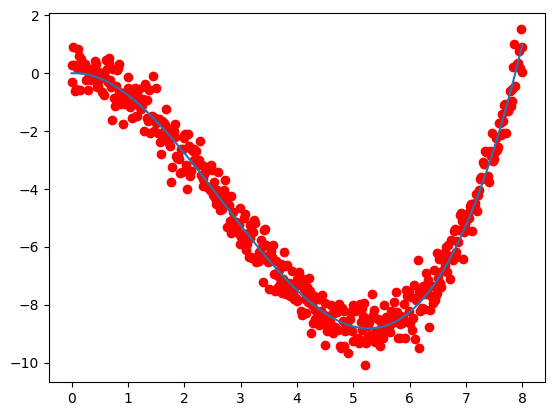

In [99]:
poly_regressor = PolynomialFeatures(degree=8)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [100]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.397835232540793
Root Mean Squared Error: 0.4917998851314139
R^2: 0.9756727436174774


## Degree 9


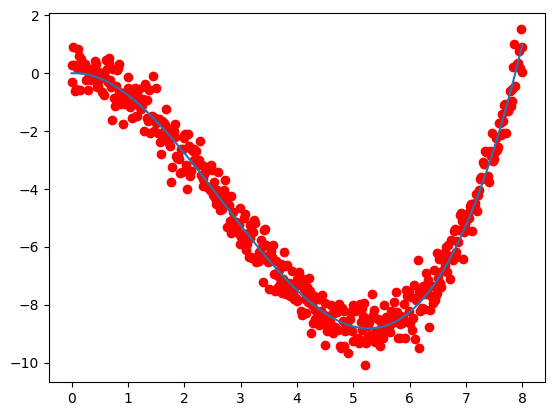

In [101]:
poly_regressor = PolynomialFeatures(degree=9)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [102]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.39783523254042336
Root Mean Squared Error: 0.49179988513239553
R^2: 0.9756727436173802


## Degree 10


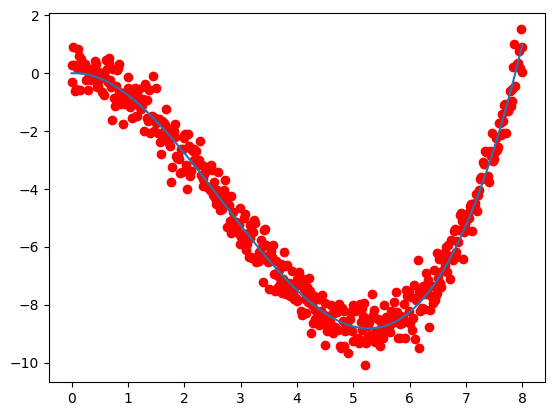

In [103]:
poly_regressor = PolynomialFeatures(degree=10)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [104]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.3978352326984563
Root Mean Squared Error: 0.49179988524685553
R^2: 0.9756727436060565


## Degree 15


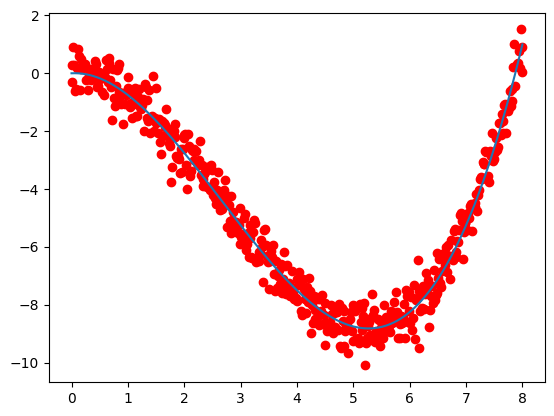

In [105]:
poly_regressor = PolynomialFeatures(degree=15)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [106]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.3978360654331801
Root Mean Squared Error: 0.4918039134214653
R^2: 0.9756723450909661


## Degree 17

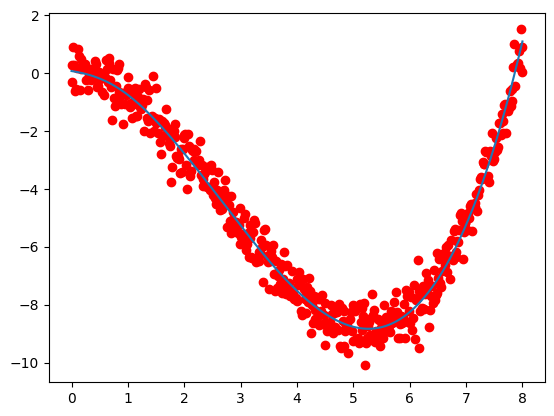

In [107]:
poly_regressor = PolynomialFeatures(degree=17)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [108]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.39759065968315865
Root Mean Squared Error: 0.4918802474206101
R^2: 0.9756647926040704


## Degree 18

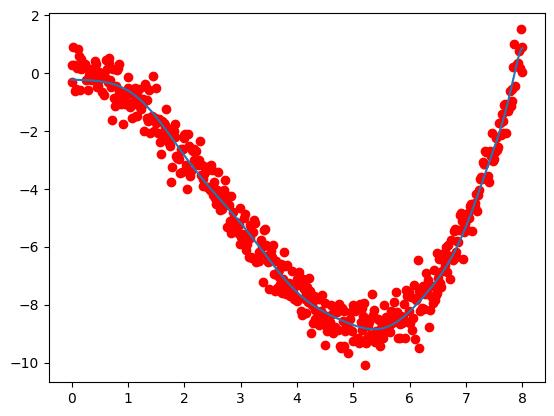

In [109]:
poly_regressor = PolynomialFeatures(degree=18)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [110]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.4096459790835786
Root Mean Squared Error: 0.5046797770153979
R^2: 0.9743818307105737


## Degree 20

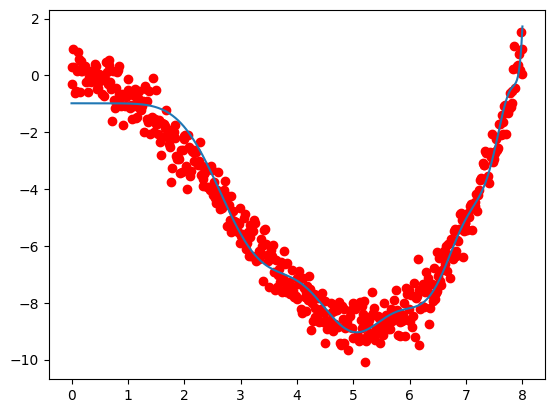

In [111]:
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [112]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 0.5299610264989669
Root Mean Squared Error: 0.6630426331197549
R^2: 0.9557819899144319


## Degree 25

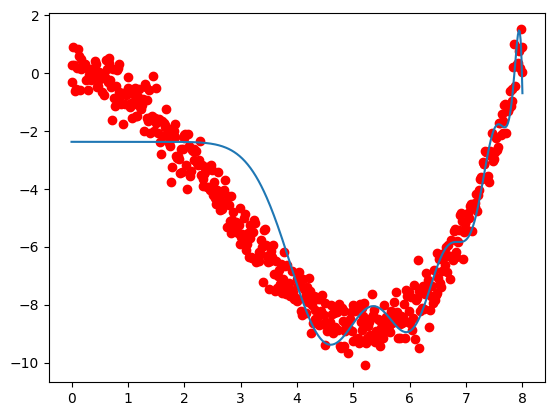

In [113]:
poly_regressor = PolynomialFeatures(degree=25)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [114]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 1.0917981053382233
Root Mean Squared Error: 1.362767575874059
R^2: 0.8132073127405819


## Degree 30

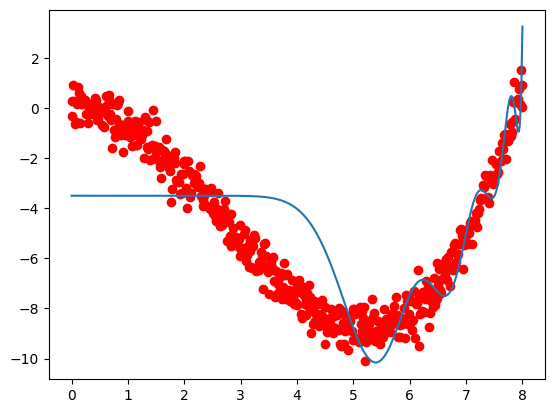

In [115]:
poly_regressor = PolynomialFeatures(degree=30)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [116]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 1.7100920847983818
Root Mean Squared Error: 2.084116744877415
R^2: 0.5631218020600453


## Degree 35

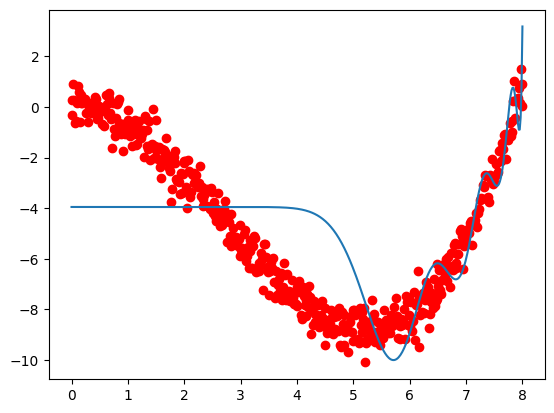

In [117]:
poly_regressor = PolynomialFeatures(degree=35)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)


In [118]:
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))

print("R^2:",r2_score(y_data2, y_pred))

Mean Absolute Error: 1.9409288322098999
Root Mean Squared Error: 2.361399992252359
R^2: 0.4391387944134171
